Best Starting City Tour:
Total Distance: 80 

Tour: [1, 2, 4, 3, 1] 

Other Routes and Distances:
Starting from City 1: Tour: [1, 2, 4, 3, 1], Total Distance: 80
Starting from City 2: Tour: [2, 1, 3, 4, 2], Total Distance: 80
Starting from City 3: Tour: [3, 1, 2, 4, 3], Total Distance: 80
Starting from City 4: Tour: [4, 1, 2, 3, 4], Total Distance: 95


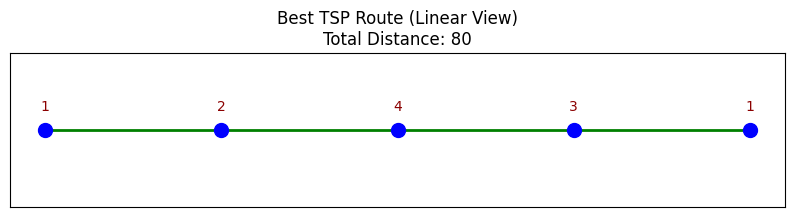

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def solve_tsp_with_MSPNN(distance_matrix, show_route=True, show_other_routes=False):
    """
    Solve the TSP using the Multiple-Starting Point Nearest Neighbor heuristic.

    Parameters:
    - distance_matrix (2D list or numpy array): Matrix of distances between cities.
    - show_route (bool): Whether to display the route plot for the best tour. Defaults to True.
    - show_other_routes (bool): If True, display all routes and distances for each starting city. Defaults to False.
    """
    n = len(distance_matrix)
    best_tour = None
    best_total_distance = float('inf')
    all_tours = []

    # Try starting from each city
    for start in range(1, n + 1):
        # Perform the nearest neighbor heuristic from this starting city
        tour, total_distance = nearest_neighbor_tsp(distance_matrix, start)

        # Store the tour and distance
        all_tours.append((tour, total_distance))

        # Update the best tour if the current tour has a shorter distance
        if total_distance < best_total_distance:
            best_tour = tour
            best_total_distance = total_distance

    # Print the best results
    print("Best Starting City Tour:")
    print("Total Distance:", best_total_distance, "\n")
    print("Tour:", best_tour, "\n")

    # Show all routes and distances if show_other_routes is True
    if show_other_routes:
        print("Other Routes and Distances:")
        for idx, (tour, dist) in enumerate(all_tours, start=1):
            print(f"Starting from City {idx}: Tour: {tour}, Total Distance: {dist}")

    # Plot the best route if show_route is True
    if show_route:
        plot_route_linear(best_tour, best_total_distance)

def nearest_neighbor_tsp(distance_matrix, start):
    """
    Perform the Nearest Neighbor heuristic starting from a specified city.

    Parameters:
    - distance_matrix (2D list or numpy array): Matrix of distances between cities.
    - start (int): The starting city (1-based index).

    Returns:
    - tour (list): The tour of cities in the order visited.
    - total_distance (float): Total distance of the tour.
    """
    n = len(distance_matrix)
    unvisited = set(range(1, n + 1))
    tour = [start]
    current_city = start
    unvisited.remove(current_city)
    total_distance = 0

    while unvisited:
        # Find the nearest unvisited city
        next_city = min(unvisited, key=lambda city: distance_matrix[current_city - 1][city - 1])
        total_distance += distance_matrix[current_city - 1][next_city - 1]
        tour.append(next_city)
        unvisited.remove(next_city)
        current_city = next_city

    # Return to the starting city
    total_distance += distance_matrix[current_city - 1][start - 1]
    tour.append(start)

    return tour, total_distance

def plot_route_linear(tour, total_distance):
    """
    Plots the route in a line for the TSP.

    Parameters:
    - tour (list): The sequence of cities in the order visited, e.g., [1, 3, 4, 2, 1].
    - total_distance (float): Total distance of the tour.
    """
    x_coords = list(range(1, len(tour) + 1))
    y_coords = [1] * len(tour)  # Constant y-coordinate for a linear view

    plt.figure(figsize=(10, 2))
    plt.title(f"Best TSP Route (Linear View)\nTotal Distance: {total_distance}")

    plt.scatter(x_coords, y_coords, color='blue', s=100, zorder=5)

    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        plt.text(x, y + 0.05, f'{tour[i]}', ha='center', color='darkred')

    for idx in range(len(tour) - 1):
        plt.plot([x_coords[idx], x_coords[idx + 1]], [1, 1], color='green', linestyle='-', linewidth=2)

    plt.ylim(0.8, 1.2)
    plt.xlabel("Cities")
    plt.gca().get_yaxis().set_visible(False)
    plt.gca().get_xaxis().set_visible(False)
    plt.show()

# Example usage
if __name__ == "__main__":
    distance_matrix = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
    ]

    # Call the function to display the best route from multiple starting points
    solve_tsp_with_MSPNN(distance_matrix, show_route=True, show_other_routes=True)